In [1]:
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from error_metrics import *
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Cleaning and Exploration

In [2]:
#Get the data type for all columns: They are all strings
for i in list(data.columns):
    print(i,"is",str(type(data[i][0])))

class is <class 'str'>
cap-shape is <class 'str'>
cap-surface is <class 'str'>
cap-color is <class 'str'>
bruises is <class 'str'>
odor is <class 'str'>
gill-attachment is <class 'str'>
gill-spacing is <class 'str'>
gill-size is <class 'str'>
gill-color is <class 'str'>
stalk-shape is <class 'str'>
stalk-root is <class 'str'>
stalk-surface-above-ring is <class 'str'>
stalk-surface-below-ring is <class 'str'>
stalk-color-above-ring is <class 'str'>
stalk-color-below-ring is <class 'str'>
veil-type is <class 'str'>
veil-color is <class 'str'>
ring-number is <class 'str'>
ring-type is <class 'str'>
spore-print-color is <class 'str'>
population is <class 'str'>
habitat is <class 'str'>


In [3]:
for i in list(data.columns):
    print(i,"contains the values: \n",str(data[i].unique()))
#stalk-root has a ?
#veil-type only has one value 

class contains the values: 
 ['p' 'e']
cap-shape contains the values: 
 ['x' 'b' 's' 'f' 'k' 'c']
cap-surface contains the values: 
 ['s' 'y' 'f' 'g']
cap-color contains the values: 
 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises contains the values: 
 ['t' 'f']
odor contains the values: 
 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment contains the values: 
 ['f' 'a']
gill-spacing contains the values: 
 ['c' 'w']
gill-size contains the values: 
 ['n' 'b']
gill-color contains the values: 
 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape contains the values: 
 ['e' 't']
stalk-root contains the values: 
 ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring contains the values: 
 ['s' 'f' 'k' 'y']
stalk-surface-below-ring contains the values: 
 ['s' 'f' 'y' 'k']
stalk-color-above-ring contains the values: 
 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring contains the values: 
 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type contains the values: 
 ['p']
veil-

In [4]:
for i in list(data.columns):
    print(i,"contains the values: \n",str(data[i].value_counts()))
#cap-shape - 4 c
#cap-surface - 4 g
#stalk-color-above-ring - 4 y 
#Veil-color - 8 yellow
# Veil-type - only p
# stalk-root - 2480 ?

class contains the values: 
 e    4208
p    3916
Name: class, dtype: int64
cap-shape contains the values: 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
cap-surface contains the values: 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
cap-color contains the values: 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
bruises contains the values: 
 f    4748
t    3376
Name: bruises, dtype: int64
odor contains the values: 
 n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
gill-attachment contains the values: 
 f    7914
a     210
Name: gill-attachment, dtype: int64
gill-spacing contains the values: 
 c    6812
w    1312
Name: gill-spacing, dtype: int64
gill-size contains the values: 
 b    5612
n    2512
Name: gill-size, dtype: int64
gill-color contains the values: 
 b    1728

In [5]:
#Checking how class compares to these values
#Drop these rows 
print(data[['class','cap-shape']].loc[data['cap-shape'] == 'c'])
print(data[['class','cap-surface']].loc[data['cap-surface'] == 'g'])
print(data[['class','stalk-color-above-ring']].loc[data['stalk-color-above-ring'] == 'y'])
print(data[['class','veil-color']].loc[data['veil-color'] == 'y'])
#Replace ? in stalk-root with u for unknown
#Drop the column veil-type

class cap-shape
5126     p         c
5508     p         c
7401     p         c
7706     p         c
     class cap-surface
5107     p           g
5126     p           g
5128     p           g
5717     p           g
     class stalk-color-above-ring
6912     p                      y
7295     p                      y
7367     p                      y
7401     p                      y
7483     p                      y
7600     p                      y
7706     p                      y
7739     p                      y
     class veil-color
6912     p          y
7295     p          y
7367     p          y
7401     p          y
7483     p          y
7600     p          y
7706     p          y
7739     p          y


In [6]:
#Cleaning the Data
#Number of rows before
print("Before cleaning. Rows =",str(len(data)))

#Drop the values in the previously stated columns
data = data[data['cap-shape'] != 'c']
data = data[data['cap-surface'] != 'g']
data = data[data['stalk-color-above-ring'] != 'y']
data = data[data['veil-color'] != 'y']

#Number of rows
print("After cleaning. Rows =",str(len(data)))

#Drop veil-type
data = data.drop('veil-type',axis=1)


#Drop stalk-root
##data = data.drop('stalk-root',axis=1)

#Replace ? with u in stalk-root
data = data.replace(to_replace ="?", value ="u") 

Before cleaning. Rows = 8124
After cleaning. Rows = 8111


In [7]:
#Check if the data has been fixed 
for i in list(data.columns):
    print(i,"contains the values: \n",str(data[i].unique()))

class contains the values: 
 ['p' 'e']
cap-shape contains the values: 
 ['x' 'b' 's' 'f' 'k']
cap-surface contains the values: 
 ['s' 'y' 'f']
cap-color contains the values: 
 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises contains the values: 
 ['t' 'f']
odor contains the values: 
 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment contains the values: 
 ['f' 'a']
gill-spacing contains the values: 
 ['c' 'w']
gill-size contains the values: 
 ['n' 'b']
gill-color contains the values: 
 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape contains the values: 
 ['e' 't']
stalk-root contains the values: 
 ['e' 'c' 'b' 'r' 'u']
stalk-surface-above-ring contains the values: 
 ['s' 'f' 'k' 'y']
stalk-surface-below-ring contains the values: 
 ['s' 'f' 'y' 'k']
stalk-color-above-ring contains the values: 
 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c']
stalk-color-below-ring contains the values: 
 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color contains the values: 
 ['w' 'n' 'o']
ring-num

# Data Exploration

In [8]:
#Get the distribution of etable/poisonous per variable
for i in list(data.columns):
    if i == 'class':
        print('This is the target')
    else:
        print(data.groupby(['class',i])[i].count().unstack(fill_value=0))
        print('\n')

This is the target
cap-shape    b     f    k   s     x
class                              
e          404  1596  228  32  1948
p           45  1553  597   0  1708


cap-surface     f     s     y
class                        
e            1560  1144  1504
p             760  1412  1731


cap-color    b   c    e     g     n   p   r   u    w    y
class                                                    
e           48  32  624  1032  1264  56  16  16  720  400
p          120  12  876   808  1020  88   0   0  315  664


bruises     f     t
class              
e        1456  2752
p        3284   619


odor     a    c     f    l   m     n    p    s    y
class                                              
e      400    0     0  400   0  3408    0    0    0
p        0  192  2160    0  36   107  256  576  576


gill-attachment    a     f
class                     
e                192  4016
p                 18  3885


gill-spacing     c     w
class                   
e             3008  1200
p 

In [9]:
#Can I calculate the chances of a mushroom being eatable based on a single variable?
for i in list(data.columns):
    if i == 'class':
        print('Here are the odds of a mushroom being eatable by variable')
    else:
        test = data.groupby(['class',i])[i].count().unstack(fill_value=0)
        print(i)
        for i in list(test.columns):
            print('A mushroom with',i,'has a',str(round((test[i][0]/(test[i][0]+test[i][1]))*100,2)),'% chance of being eatable')
        print('\n')

Here are the odds of a mushroom being eatable by variable
cap-shape
A mushroom with b has a 89.98 % chance of being eatable
A mushroom with f has a 50.68 % chance of being eatable
A mushroom with k has a 27.64 % chance of being eatable
A mushroom with s has a 100.0 % chance of being eatable
A mushroom with x has a 53.28 % chance of being eatable


cap-surface
A mushroom with f has a 67.24 % chance of being eatable
A mushroom with s has a 44.76 % chance of being eatable
A mushroom with y has a 46.49 % chance of being eatable


cap-color
A mushroom with b has a 28.57 % chance of being eatable
A mushroom with c has a 72.73 % chance of being eatable
A mushroom with e has a 41.6 % chance of being eatable
A mushroom with g has a 56.09 % chance of being eatable
A mushroom with n has a 55.34 % chance of being eatable
A mushroom with p has a 38.89 % chance of being eatable
A mushroom with r has a 100.0 % chance of being eatable
A mushroom with u has a 100.0 % chance of being eatable
A mushroom 

In [10]:
#Create 3 dictionaries 
    #1 that has poisonous traits, 
    #1 that has eatable traits, 
    #1 that has 'you feeling lucky?' traits
poison = {}
eatable = {}
idkTryIt = {}
for col in list(data.columns):
    if col == 'class':
        print('Here are the odds of a mushroom being eatable by variable')
    else:
        test = data.groupby(['class',col])[col].count().unstack(fill_value=0)
        for ver in list(test.columns):
            if (test[ver][0]/(test[ver][0]+test[ver][1])) == 1:
                eatable[col] = ver
            elif (test[ver][0]/(test[ver][0]+test[ver][1])) == 0:
                poison[col] = ver
            else:
                idkTryIt[col+'-'+ver] = round((test[ver][0]/(test[ver][0]+test[ver][1])),4)

Here are the odds of a mushroom being eatable by variable


In [11]:
print(str(len(poison)),'variables indicate 100% poisonous')
print(str(len(eatable)),'variables indicate 100% eatable')
print(str(len(idkTryIt)),"variables don't indicate anything for certain")

7 variables indicate 100% poisonous
13 variables indicate 100% eatable
70 variables don't indicate anything for certain


In [12]:
#Create a dataframe containing the trait and the % chance that it is eatable & % chance poisonous 
traitName = []
pEat = []
pPois = []
for col in list(data.columns):
    if col == 'class':
        print('Here are the odds of a mushroom being eatable by variable')
    else:
        test = data.groupby(['class',col])[col].count().unstack(fill_value=0)
        for ver in list(test.columns):
            traitName.append(col+'-'+ver)
            pEat.append(round((test[ver][0]/(test[ver][0]+test[ver][1]))*100,2))
            pPois.append(round((test[ver][1]/(test[ver][0]+test[ver][1]))*100,2))

Here are the odds of a mushroom being eatable by variable


In [13]:
percentTraits = {'trait_name':traitName, 'percent_eatable':pEat,'percent_pois':pPois}
percentTraits = pd.DataFrame(percentTraits)
percentTraits.head()

,trait_name,percent_eatable,percent_pois
0,cap-shape-b,89.98,10.02
1,cap-shape-f,50.68,49.32
2,cap-shape-k,27.64,72.36
3,cap-shape-s,100.00,0.00
4,cap-shape-x,53.28,46.72


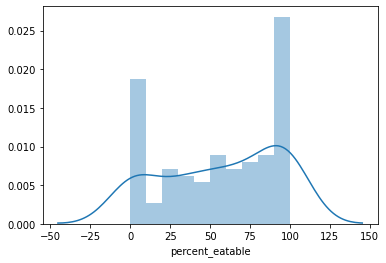

In [14]:
#Histogram of the percent of the mushrooms with a certain trait that is eatable
sns.distplot(percentTraits['percent_eatable'],bins=10)
#sns.distplot(percentTraits['percent_pois'],bins=10)

Some things to note:

-Based on the data you can classify a mushroom as poisonous/eatable with almost 100% accuracy based on smell alone

-stalk-color-above-ring: 5/8 of the variables can be used to classify a mushroom with 100% certainty

-stalk-color-below-ring: 5/8 of the variables can be used to classify a mushroom with 100% certainty

-veil-color: 2/3 of the variables can be used to classify a mushroom with 100% certainty

# Prepping the data for Random Forest

In [15]:
#Removing the target variable
features = list(data)
features.remove('class')
data_x = data[features]
data_y = data['class']

#Convert Class to 1 and 0 and OneHotEncode other columns to 1 and 0
data_y.replace({'e':0,'p':1}, inplace=True)
data_x = pd.get_dummies(data_x) #It works WITHOUT onehotencoding variables!!!

In [16]:
#for i in list(data_x.columns):
#    print(i)
len(list(data_x.columns))

112

## Random Forest code from notes

In [17]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 4)

In [18]:
# Build a sequence of Random Forest models for different n_est and depth values
n_ests = [5, 8, 10, 20, 50, 100] #Number of estimators meaning the number of 'trees' being considores for the model
depths = [2, 4, 6, 8, 20] #How deep are the trees meaning how many variables are considered in building a single tree
#Create a dataframe containing n_ests, depth, and accuracy so it can be plotted
ne = []
dep = []
acc = []
for n in n_ests:
    for dp in depths:
        mod = ensemble.RandomForestClassifier(n_estimators = n, max_depth = dp)
        mod.fit(x_train, y_train)
        y_hat = mod.predict(x_test)
        print('------ Evaluating model: n_estimators =' + str(n) + ', max_depth = ' + str(dp),'------')
        print_binary_classif_error_report(y_test, y_hat)
        ne.append(n)
        dep.append(dp)
        acc.append(accuracy_score(y_test, y_hat))

#The F1 score can be interpreted as a weighted average of the precision and recall, 

------ Evaluating model: n_estimators =5, max_depth = 2 ------
Accuracy: 0.9313886606409203
Precision: 0.9961089494163424
Recall: 0.8626790227464195
F1: 0.9246049661399548
ROC AUC: 0.9297356621350381
Confusion Matrix: 
[[1243    4]
 [ 163 1024]]
------ Evaluating model: n_estimators =5, max_depth = 4 ------
Accuracy: 0.9404272801972062
Precision: 1.0
Recall: 0.8778433024431339
F1: 0.9349484073575594
ROC AUC: 0.938921651221567
Confusion Matrix: 
[[1247    0]
 [ 145 1042]]
------ Evaluating model: n_estimators =5, max_depth = 6 ------
Accuracy: 0.9880854560394412
Precision: 0.9777227722772277
Recall: 0.9983150800336984
F1: 0.9879116298457691
ROC AUC: 0.9883315576591909
Confusion Matrix: 
[[1220   27]
 [   2 1185]]
------ Evaluating model: n_estimators =5, max_depth = 8 ------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Confusion Matrix: 
[[1247    0]
 [   0 1187]]
------ Evaluating model: n_estimators =5, max_depth = 20 ------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1

In [19]:
#Can I make a plot of the accuracy vs n_estimators and max_depth
#Create a dataframe
accMeasure = {'n_ests':ne,'depths':dep,"accuracy":acc}
accMeasure = pd.DataFrame(accMeasure)
accMeasure.sort_values(by=['accuracy'], ascending=False)

,n_ests,depths,accuracy
29,100,20,1.000000
24,50,20,1.000000
3,5,8,1.000000
4,5,20,1.000000
28,100,8,1.000000
23,50,8,1.000000
19,20,20,1.000000
18,20,8,1.000000
17,20,6,1.000000
14,10,20,1.000000


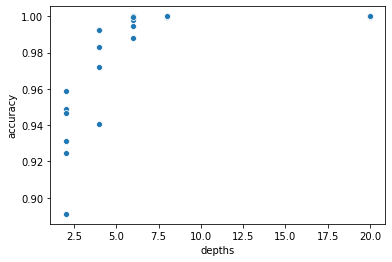

In [20]:
#Plotting results
sns.scatterplot(x="depths", y="accuracy", data=accMeasure) #blue


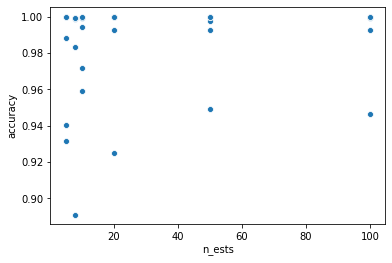

In [21]:
#Plotting results
sns.scatterplot(x="n_ests", y="accuracy", data=accMeasure) #orange

#Indicates we should do some variable selection methods 
#The variation likely indicates overfitting and can be caused by how the data is split

# K-Fold Cross Validation
### Number of splits: 10 (default)
### Random Forest: number of estimators - 50, max depth = 8

In [44]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import ensemble
from CV import * 
# Splitting df
y = data_y
x = data_x
# Setting up cross-validation
cv=CV(x,y)
x_shuff, y_shuff = cv.shuffle() # shuffling data sets
train_indices,test_indices = cv.split() # nsplits = 10 by default
n=50 # number of estimators
dp = 8 # max-depth
r2_list = []
mse_list = []

for train_idx, test_idx in zip(train_indices,test_indices):
        x_train, y_train = x_shuff.loc[train_idx], y_shuff.loc[train_idx]
        x_test, y_test = x_shuff.loc[test_idx], y_shuff.loc[test_idx]
        mod = ensemble.RandomForestClassifier(n_estimators = n, max_depth = dp)
        mod.fit(x_train, y_train)
        y_hat = mod.predict(x_test)
        fold_r2 = r2_score(y_test,y_hat) 
        fold_mse = mean_squared_error(y_test,y_hat)
        r2_list.append(fold_r2)
        mse_list.append(fold_mse)
r2 = sum(r2_list)/len(r2_list)
mse = sum(mse_list)/len(mse_list)
print("R^2 average for all folds: {0:.9f}".format(r2))
print("MSE average for all folds: {0:.9f}".format(mse))

R^2 average for all folds: 1.000000000
MSE average for all folds: 0.000000000


# Feature Importance

In [23]:
import sklearn
print(sklearn.__version__)

0.23.1


In [24]:
!pip install --upgrade sklearn

zsh:1: command not found: pip


In [25]:
#Using Training Data
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

#List of variable names
variableNames = list(x_train.columns)
importanceScore = []

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 4)

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    importanceScore.append(v)

#Gives us a ranked dataframe with a variable and it's score (larger is better)
importanceMeasure = pd.DataFrame({'Variable':variableNames, 'Score': importanceScore})
importanceMeasure.sort_values(by=['Score'], ascending=False).head(15)

,Variable,Score
25,odor_n,0.618345
50,stalk-root_c,0.179382
52,stalk-root_r,0.086248
95,spore-print-color_r,0.037185
23,odor_l,0.026558
20,odor_a,0.019556
83,ring-number_o,0.015261
61,stalk-surface-below-ring_y,0.009912
103,population_v,0.006143
19,bruises_t,0.001391


In [26]:
#Using ALL of the data
#List of variable names
variableNames = list(x_train.columns)
importanceScore = []

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(data_x, data_y)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    importanceScore.append(v)

#Gives us a ranked dataframe with a variable and it's score (larger is better)
importanceMeasure = pd.DataFrame({'Variable':variableNames, 'Score': importanceScore})
importanceMeasure.sort_values(by=['Score'], ascending=False).head(15)

,Variable,Score
25,odor_n,0.622452
50,stalk-root_c,0.177592
61,stalk-surface-below-ring_y,0.096243
95,spore-print-color_r,0.034125
20,odor_a,0.023406
23,odor_l,0.022824
71,stalk-color-below-ring_c,0.016611
57,stalk-surface-above-ring_y,0.005268
18,bruises_f,0.001459
33,gill-size_b,0.000021


# Variable selection

In [27]:
data_vs = data.drop('odor',axis=1)

#Removing the target variable
features = list(data_vs)
features.remove('class')
data_x = data_vs[features]
data_y = data_vs['class']

##Convert Class to 1 and 0 and OneHotEncode other columns to 1 and 0
#data_y.replace({'e':0,'p':1}, inplace=True)
data_x = pd.get_dummies(data_x)

In [28]:
len(list(data_x.columns))

103

In [29]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 4)

In [30]:
# Buils a sequence of Random Forest models for different n_est and depth values
n_ests = [5, 10, 50, 100] #Number of estimators meaning the number of 'trees' being considores for the model
depths = [2, 4, 6, 8, 20] #How deep are the trees meaning how many variables are considered in building a single tree
#Create a dataframe containing n_ests, depth, and accuracy so it can be plotted
ne = []
dep = []
acc = []
for n in n_ests:
    for dp in depths:
        mod = ensemble.RandomForestClassifier(n_estimators = n, max_depth = dp)
        mod.fit(x_train, y_train)
        y_hat = mod.predict(x_test)
        print('------ Evaluating model: n_estimators =' + str(n) + ', max_depth = ' + str(dp),'------')
        print_binary_classif_error_report(y_test, y_hat)
        ne.append(n)
        dep.append(dp)
        acc.append(accuracy_score(y_test, y_hat))

#The F1 score can be interpreted as a weighted average of the precision and recall, 

------ Evaluating model: n_estimators =5, max_depth = 2 ------
Accuracy: 0.9174198849630238
Precision: 0.9370567375886525
Recall: 0.8904802021903959
F1: 0.9131749460043197
ROC AUC: 0.9167717771176518
Confusion Matrix: 
[[1176   71]
 [ 130 1057]]
------ Evaluating model: n_estimators =5, max_depth = 4 ------
Accuracy: 0.934264585045193
Precision: 0.9732718894009217
Recall: 0.8896377422072451
F1: 0.9295774647887324
ROC AUC: 0.9331909641268783
Confusion Matrix: 
[[1218   29]
 [ 131 1056]]
------ Evaluating model: n_estimators =5, max_depth = 6 ------
Accuracy: 0.9995891536565324
Precision: 1.0
Recall: 0.9991575400168492
F1: 0.9995785924989464
ROC AUC: 0.9995787700084247
Confusion Matrix: 
[[1247    0]
 [   1 1186]]
------ Evaluating model: n_estimators =5, max_depth = 8 ------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Confusion Matrix: 
[[1247    0]
 [   0 1187]]
------ Evaluating model: n_estimators =5, max_depth = 20 ------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1

In [31]:
#Can I make a plot of the accuracy vs n_estimators and max_depth
#Create a dataframe
accMeasure = {'n_ests':ne,'depths':dep,"accuracy":acc}
accMeasure = pd.DataFrame(accMeasure)
accMeasure.sort_values(by=['accuracy'], ascending=False)

,n_ests,depths,accuracy
19,100,20,1.000000
9,10,20,1.000000
3,5,8,1.000000
4,5,20,1.000000
18,100,8,1.000000
14,50,20,1.000000
13,50,8,1.000000
12,50,6,1.000000
2,5,6,0.999589
8,10,8,0.998357


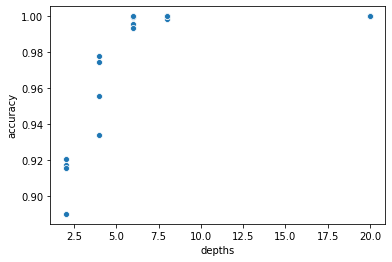

In [32]:
#Plotting results
sns.scatterplot(x="depths", y="accuracy", data=accMeasure) #blue

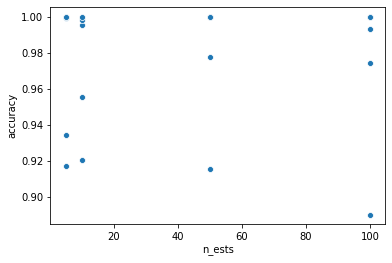

In [33]:
#Plotting results
sns.scatterplot(x="n_ests", y="accuracy", data=accMeasure) #orange

## Another Example

https://towardsdatascience.com/random-forest-classification-and-its-implementation-d5d840dbead0

sklearn.decisiontreeclassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0)
model.fit(x_train,y_train)
#model.decision_path(1)

RandomForestClassifier(criterion='entropy', random_state=0)

In [35]:
#Predicting the test set results and making the Confusion matrix
y_pred = model.predict(x_test)

#Making the confusion matric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1247,    0],
       [   0, 1187]])

In [36]:
from sklearn.datasets import *
regr = tree.DecisionTreeRegressor(max_depth=2)  # limit depth of tree

print(data_x, data_y)

cap-shape_b  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0               0            0            0            0            1   
1               0            0            0            0            1   
2               1            0            0            0            0   
3               0            0            0            0            1   
4               0            0            0            0            1   
...           ...          ...          ...          ...          ...   
8119            0            0            1            0            0   
8120            0            0            0            0            1   
8121            0            1            0            0            0   
8122            0            0            1            0            0   
8123            0            0            0            0            1   

      cap-surface_f  cap-surface_s  cap-surface_y  cap-color_b  cap-color_c  \
0                 0              1              0 

In [37]:
#Getting the score for the model
model.score(x_test,y_test)

1.0

# Visualize Decision Tree

In [38]:
from sklearn import tree
import sklearn
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt

In [39]:
#get names of columns 2+
nonclass = list(data.columns)[1:]

#make copy of the dataframe to change
shroomies = data.copy()

#convert values to numbers for analysis
for key, value in shroomies.iteritems(): 
    codes, uniques = pd.factorize(value) 
    shroomies[key] = codes

#separate out data and target
shroom_data = shroomies[nonclass]
shroom_target = shroomies['class']

# separate out data and target
print(len(shroom_data.index))
print(len(shroom_target.index))

shroom_data.to_csv("shroom_data.csv")
shroom_target.to_csv("shroom_target.csv")

8111
8111


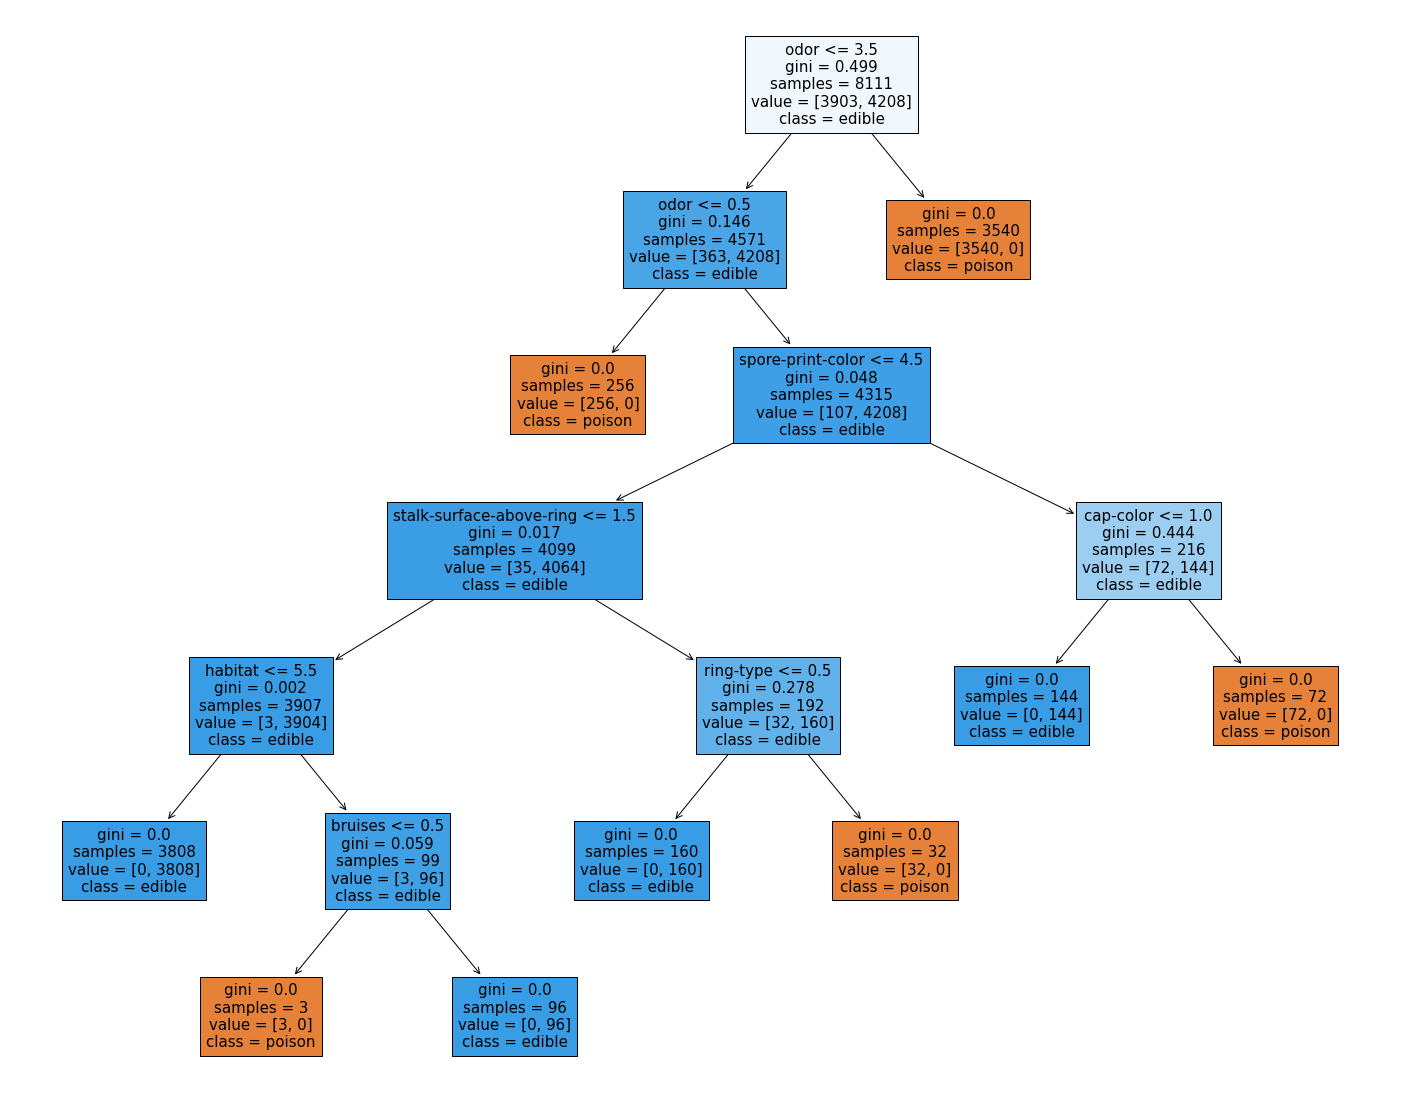

In [40]:
from sklearn.tree import export_graphviz

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(shroom_data, shroom_target)
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(clf, 
                   feature_names=nonclass,  
                   class_names=['poison', 'edible'],
                   filled=True)